In [1]:
import pandas as pd

train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 수치형 데이터 확인
- Age
- SibSp
- Parch
- Fare

#### 수치형 데이터의 종류 
#### 1. 이산형 데이터 (Discrete Data)
- **정의:** 셀 수 있는 값만 가질 수 있는 데이터 (주로 정수)
- **특징:** 값과 값 사이에 중간값이 존재하지 않음
- **예시:**
  - 학생 수
  - 판매 횟수
  - 주사위 눈
  - 횟수처럼 셀 수 있는 데이터

---

#### 2. 연속형 데이터 (Continuous Data)
- **정의:** 특정 구간 안에서 무한히 많은 값을 가질 수 있는 데이터
- **특징:** 값 사이에 무한히 많은 중간값 존재 가능
- **예시:**
  - 키, 몸무게
  - 시간, 온도
  - 측정 단위에 따라 소수점 단위까지 가능


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 수치형 데이터 탐색 방법
- Five Number Summary (최소, 최대, 중간, 제1사분위수, 제3사분위수) + 평균
- 특이값 확인
- 필요할 시, Box Plot 및 Histogram 그리기

#### Age 분석하기
- 최소값을 확인했을 때 Age가 정수가 아닌 값이 존재

In [6]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### 결측치 확인
- 결측치가 177개 존재
- 어떻게 처리할지 고민해야 함

In [7]:
train["Age"].isnull().sum()

np.int64(177)

In [8]:
train_age = train.copy()

##### 결측치 처리 방법 (결측치 제거)
- 결측치를 모두 삭제하는 것이 반드시 좋은 방법은 아님
- 데이터 손실 발생 → 표본 수가 줄어 통계적 신뢰도 감소
- 삭제 기준이 편향을 만들 수 있음
  

In [9]:
train_age = train_age.dropna(subset=['Age'])
train_age["Age"].isnull().sum()

np.int64(0)

##### 소숫점 나이 확인

In [11]:
float_ages = train_age.loc[train_age["Age"] % 1 != 0]
float_ages.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
57,58,0,3,"Novel, Mr. Mansouer",male,28.50,0,0,2697,7.2292,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,NaN,Q
122,123,0,2,"Nasser, Mr. Nicholas",male,32.50,1,0,237736,30.0708,NaN,C


##### Age를 모두 integer로 만든 새로운 feature를 생성

In [13]:
train_age["Age_int"] = train_age["Age"].astype(int)
train_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_int
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35


##### Age에 따른 Survived 확인

In [18]:
survival_counts = train_age.groupby(["Age_int","Survived"]).size().unstack(fill_value=0)
survival_counts.columns = ["Dead", "Survived"]
survival_counts.head()

,Dead,Survived
Age_int,,
0,0,7
1,2,5
2,7,3
3,1,5
4,3,7


#### 그래프 파악
- 20대 이전의 탑승객은 생존률이 높음
- 청년층 ~ 중장년층의 사망률이 높음


In [ ]:
import plotly.graph_objects as go

df = survival_counts.reset_index()

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=df["Age_int"], # x축
        y=df["Dead"], # y축
        name="Dead", # 범례 이름
        marker_color="blue", # 막대 색상
        opacity=0.5
    )
)

fig.add_trace(
    go.Bar(
        x=df["Age_int"], # x축
        y=df["Survived"], # y축
        name="Survived", # 범례 이름
        marker_color="orange", # 막대 색상
        opacity=0.5
    )
)

fig.update_layout(
    barmode='overlay',
    title='Age Distribution by Survival Status'
)

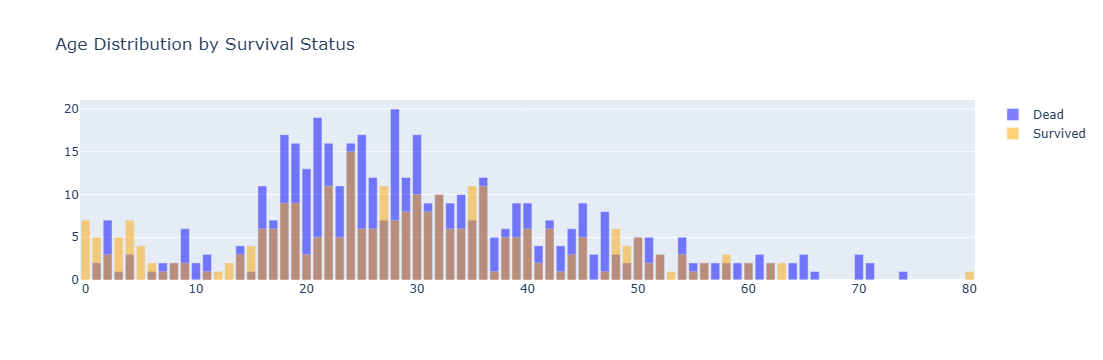